In [23]:
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

In [3]:
d=pd.read_csv("Rajasthan_1990_2022_Jodhpur.csv",index_col="time")
d

,tavg,tmin,tmax,prcp
time,,,,
01-01-1990,22.9,19.1,28.4,NaN
02-01-1990,21.7,NaN,26.5,0.0
03-01-1990,21.0,16.4,26.5,0.0
04-01-1990,20.8,NaN,27.4,0.0
05-01-1990,20.4,14.2,26.1,0.0
...,...,...,...,...
21-07-2022,23.7,20.5,30.8,82.5
22-07-2022,23.2,21.1,27.9,0.0
23-07-2022,23.1,20.9,26.7,0.0


In [4]:
d.apply(pd.isnull).sum()/d.shape[0]

tavg    0.005885
tmin    0.116782
tmax    0.052884
prcp    0.388431
dtype: float64

In [5]:
d["prcp"].value_counts()

0.0     4262
0.5      277
0.3      268
1.0      216
2.0      157
        ... 
30.5       1
66.5       1
2.1        1
10.0       1
1.7        1
Name: prcp, Length: 277, dtype: int64

In [6]:
d[pd.isnull(d["prcp"])]

,tavg,tmin,tmax,prcp
time,,,,
01-01-1990,22.9,19.1,28.4,NaN
06-01-1990,20.4,17.1,24.2,NaN
07-01-1990,18.8,NaN,20.5,NaN
16-02-1990,25.8,20.6,31.5,NaN
27-02-1990,23.6,18.6,29.5,NaN
...,...,...,...,...
26-12-2020,21.2,16.0,29.0,NaN
27-12-2020,21.4,15.2,28.4,NaN
28-12-2020,21.2,16.4,29.8,NaN


In [7]:
d["prcp"]=d["prcp"].fillna(0)

In [8]:
d[pd.isnull(d["tmin"])]

,tavg,tmin,tmax,prcp
time,,,,
02-01-1990,21.7,NaN,26.5,0.0
04-01-1990,20.8,NaN,27.4,0.0
07-01-1990,18.8,NaN,20.5,0.0
17-01-1990,23.8,NaN,29.0,0.0
21-01-1990,23.8,NaN,NaN,0.0
...,...,...,...,...
18-05-2016,23.7,NaN,28.3,0.0
15-07-2016,24.8,NaN,30.7,0.0
06-03-2017,26.1,NaN,34.5,0.0


In [9]:
d=d.fillna(method="ffill")
d.apply(pd.isnull).sum()/d.shape[0]

tavg    0.0
tmin    0.0
tmax    0.0
prcp    0.0
dtype: float64

In [10]:
d.dtypes

tavg    float64
tmin    float64
tmax    float64
prcp    float64
dtype: object

In [11]:
d.index

Index(['01-01-1990', '02-01-1990', '03-01-1990', '04-01-1990', '05-01-1990',
       '06-01-1990', '07-01-1990', '08-01-1990', '09-01-1990', '10-01-1990',
       ...
       '16-07-2022', '17-07-2022', '18-07-2022', '19-07-2022', '20-07-2022',
       '21-07-2022', '22-07-2022', '23-07-2022', '24-07-2022', '25-07-2022'],
      dtype='object', name='time', length=11894)

In [12]:
d.apply(lambda x : (x==9999).sum())

tavg    0
tmin    0
tmax    0
prcp    0
dtype: int64

<AxesSubplot:xlabel='time'>

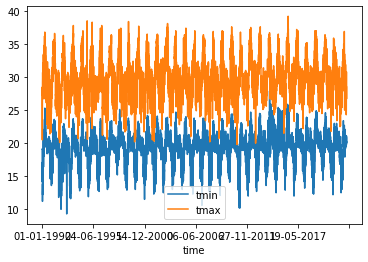

In [13]:
d[["tmin","tmax"]].plot()

<AxesSubplot:xlabel='time'>

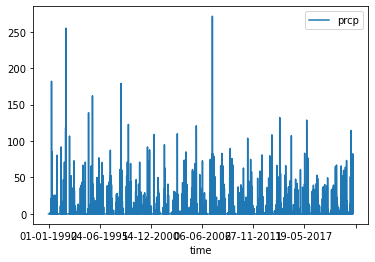

In [14]:
d[["prcp"]].plot()

In [19]:
d["target"]=d.shift(-1)["tmax"]
d

,tavg,tmin,tmax,prcp,target
time,,,,,
01-01-1990,22.9,19.1,28.4,0.0,26.5
02-01-1990,21.7,19.1,26.5,0.0,26.5
03-01-1990,21.0,16.4,26.5,0.0,27.4
04-01-1990,20.8,16.4,27.4,0.0,26.1
05-01-1990,20.4,14.2,26.1,0.0,24.2
...,...,...,...,...,...
21-07-2022,23.7,20.5,30.8,82.5,27.9
22-07-2022,23.2,21.1,27.9,0.0,26.7
23-07-2022,23.1,20.9,26.7,0.0,26.7


In [20]:
d=d.iloc[:-1,:].copy()
d

,tavg,tmin,tmax,prcp,target
time,,,,,
01-01-1990,22.9,19.1,28.4,0.0,26.5
02-01-1990,21.7,19.1,26.5,0.0,26.5
03-01-1990,21.0,16.4,26.5,0.0,27.4
04-01-1990,20.8,16.4,27.4,0.0,26.1
05-01-1990,20.4,14.2,26.1,0.0,24.2
...,...,...,...,...,...
20-07-2022,24.9,19.8,30.8,0.0,30.8
21-07-2022,23.7,20.5,30.8,82.5,27.9
22-07-2022,23.2,21.1,27.9,0.0,26.7


In [24]:
reg=Ridge(alpha=.1)
predictors=["prcp","tmax","tmin"]
train=d.loc[:"31-12-2020"]
test=d.loc["01-01-2021":]
reg.fit(train[predictors],train["target"])

Ridge(alpha=0.1)

In [26]:
predictions=reg.predict(test[predictors])
mean_absolute_error(test["target"],predictions)

0.9355689835860534

In [28]:
c=pd.concat([test["target"],pd.Series(predictions,index=test.index)],axis=1)
c.columns=["Actual","Predictions"]
c

,Actual,Predictions
time,,
01-01-2021,26.0,25.715572
02-01-2021,26.0,26.335333
03-01-2021,27.6,26.424378
04-01-2021,26.2,27.832799
05-01-2021,27.3,26.597401
...,...,...
20-07-2022,30.8,30.714282
21-07-2022,27.9,30.708577
22-07-2022,26.7,28.199395


<AxesSubplot:xlabel='time'>

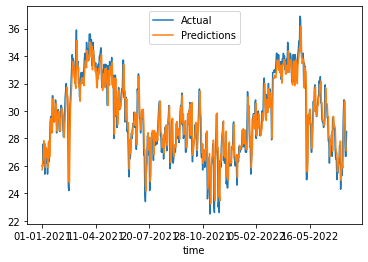

In [29]:
c.plot()

In [30]:
reg.coef_

array([-4.11949047e-04,  8.85313212e-01,  4.04004437e-02])

In [31]:
def create_predictions(predictors,d,reg):
    train=d.loc[:"31-12-2020"]
    test=d.loc["01-01-2021":]
    reg.fit(train[predictors],train["target"])
    predictions=reg.predict(test[predictors])
    error=mean_absolute_error(test["target"],predictions)
    c=pd.concat([test["target"],pd.Series(predictions,index=test.index)],axis=1)
    c.columns=["Actual","Predictions"]
    return error,c

In [32]:
d["month_max"]=d["tmax"].rolling(30).mean()
d

,tavg,tmin,tmax,prcp,target,month_max
time,,,,,,
01-01-1990,22.9,19.1,28.4,0.0,26.5,NaN
02-01-1990,21.7,19.1,26.5,0.0,26.5,NaN
03-01-1990,21.0,16.4,26.5,0.0,27.4,NaN
04-01-1990,20.8,16.4,27.4,0.0,26.1,NaN
05-01-1990,20.4,14.2,26.1,0.0,24.2,NaN
...,...,...,...,...,...,...
20-07-2022,24.9,19.8,30.8,0.0,30.8,27.210000
21-07-2022,23.7,20.5,30.8,82.5,27.9,27.310000
22-07-2022,23.2,21.1,27.9,0.0,26.7,27.313333


In [33]:
d["month_day_max"]=d["month_max"]/d["tmax"]
d["max_min"]=d["tmax"]/d["tmin"]
predictors=["prcp","tmax","tmin","month_max","month_day_max","max_min"]
d=d.iloc[30:,:].copy()
error,c=create_predictions(predictors,d,reg)
error

0.9104586669981909

<AxesSubplot:xlabel='time'>

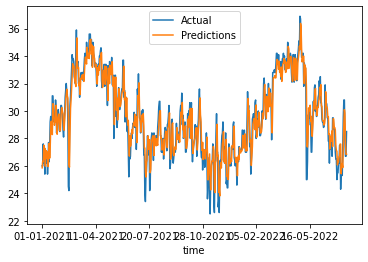

In [34]:
c.plot()

In [36]:
reg.coef_

array([-3.21543476e-03,  1.27210902e+00,  6.01002605e-02, -3.42086199e-01,
        1.58351158e+01,  1.00047033e+00])

In [37]:
d.corr()["target"]

tavg             0.840010
tmin             0.435009
tmax             0.900389
prcp            -0.085519
target           1.000000
month_max        0.775025
month_day_max   -0.397277
max_min          0.261535
Name: target, dtype: float64

In [40]:
c["diff"]=(c["Actual"]-c["Predictions"]).abs()
c.sort_values("diff",ascending=False).head()

,Actual,Predictions,diff
time,,,
10-05-2022,25.0,31.675578,6.675578
19-02-2021,24.5,29.394671,4.894671
15-05-2021,28.0,32.476380,4.476380
18-11-2021,23.2,27.094153,3.894153
26-11-2021,23.0,26.781056,3.781056
